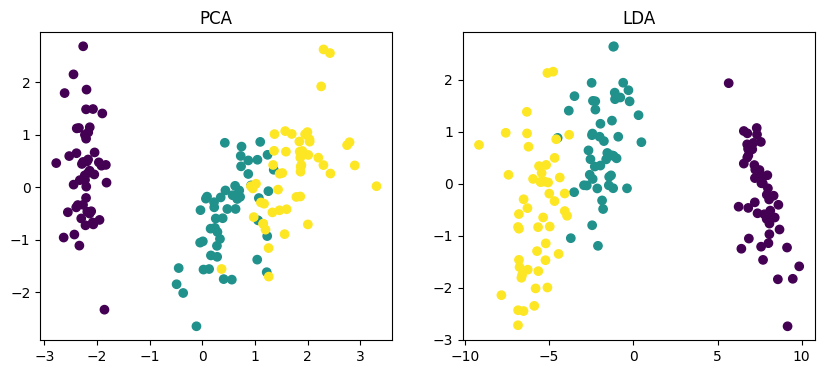

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

import matplotlib.pyplot as plt
# Plot PCA
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
# Plot LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA')
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Train logistic regression on PCA-reduced data
model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)
y_pred_pca = model_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-reduced data:", accuracy_pca)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
# Train logistic regression on LDA-reduced data
model_lda = LogisticRegression()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy on LDA-reduced data:", accuracy_lda)

Accuracy on PCA-reduced data: 0.9
Accuracy on LDA-reduced data: 1.0
